# Test script to find all locations with large swirl

Aim is to take a velocity field, find all locations with large swirl, and then identify distinct blobs of swirl. 

This script makes use of the Source Extraction and Photometry (SEP) library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
from importlib import reload
import PIVutils

In [2]:
#PIVutils = reload(PIVutils)
X, Y, Swirl, Cond, Prof = PIVutils.importMatlabPIVdata2D('/Users/Owen/Dropbox/Data/ABL/SBL PIV data/RNV45-RI2.mat',['X','Y','Swirl'],['Cond','Prof'])

In [3]:
NanLocs = np.isnan(Swirl)
uSize = Swirl.shape
scale = (X[1,-1]-X[1,1])/(uSize[1]-1)

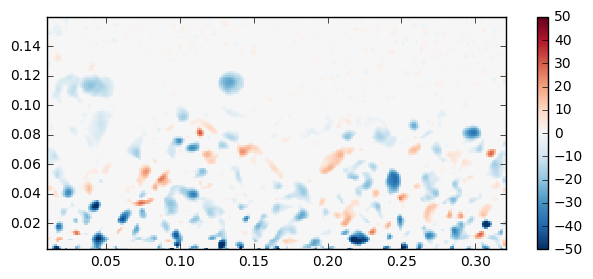

In [4]:
PIVutils = reload(PIVutils)
PIVutils.plotScalarField(X,Y,Swirl[:,:,1],50)

# Normalize the swirl for distance from the wall (if wanted)

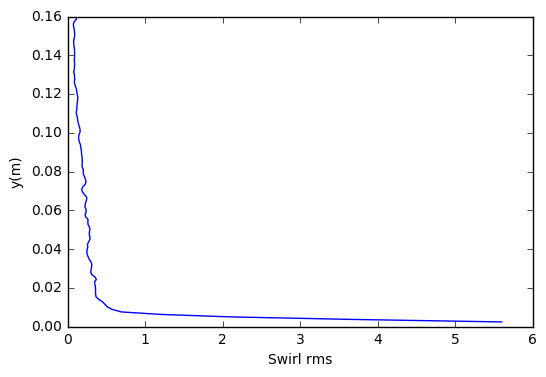

In [5]:
#Find profile of swirl std
SwirlStd = np.std(np.nanmean(Swirl,axis=2),axis = 1)
plt.plot(SwirlStd,Y[:,1])
plt.ylabel('y(m)')
plt.xlabel('Swirl rms')

In [6]:
#Normalize field by the std of Swirl
SwirlNorm = Swirl/SwirlStd.reshape(uSize[0],1,1) #match the SwirlStd length (123) with the correct index in Swirl (also 123)

# Plot after normalization

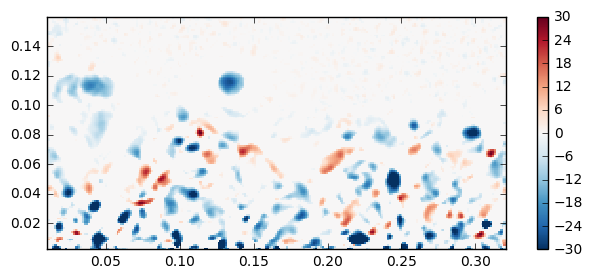

In [7]:
PIVutils.plotScalarField(X,Y,Swirl[:,:,1],30)

In [8]:
Swirl[NanLocs] = 0   #Get rid of nans for now

# Create thresholded field

In [9]:
import copy

SwirlFilt = copy.copy(Swirl)    #think this should completely copy the list, allowing me to try things

#Swirl must be above a certain background value or it is zeroed
SwirlFilt[np.absolute(SwirlFilt)<7] = 0

#Then only keep those locations where swirls is greater than Thresh*SwirlStd
Thresh = 60
SwirlFilt[np.absolute(SwirlNorm)<Thresh] = 0

# Find all blobs that agree with the thresholds

In [137]:
PIVutils = reload(PIVutils)
[num_features,features_per_frame, labeled_array, cent] = PIVutils.findBlobs(SwirlFilt)

There are  55342  features identified


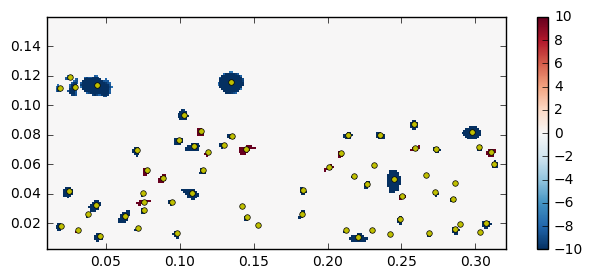

In [138]:
[f, ax] = PIVutils.plotScalarField(X,Y,SwirlFilt[:,:,1],10)

for i in range(features_per_frame[1]):
    plt.plot(cent[1][i][1]*scale+X[1,1],cent[1][i][0]*scale+Y[1,1],'oy',markersize=4,markeredgecolor=None)

# Find all blobs and filter for size

In [139]:
PIVutils = reload(PIVutils)
Thresh = 50
[num_features,features_per_frame, labeled_array, cent] = PIVutils.findBlobs(SwirlFilt,50)

There are  55342  features identified
A total of  2638  are larger than the threshold size


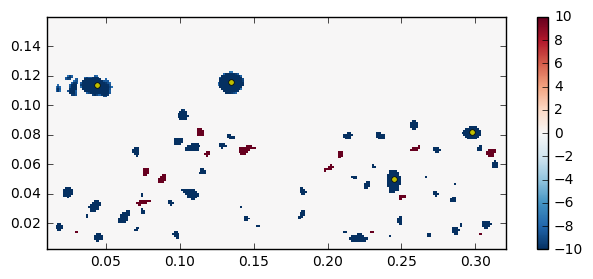

In [140]:
[f, ax] = PIVutils.plotScalarField(X,Y,SwirlFilt[:,:,1],10)

for i in range(features_per_frame[1]):
    plt.plot(cent[1][i][1]*scale+X[1,1],cent[1][i][0]*scale+Y[1,1],'oy',markersize=4,markeredgecolor=None)